In [ ]:
classification using deep neural network binary classification using deep neural network

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow import keras
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, GlobalMaxPooling1D

In [ ]:
# Load and preprocess the IMDB dataset
max_words = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_words)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
max_sequence_length = 500
x_train = keras.preprocessing.sequence.pad_sequences(x_train, maxlen=max_sequence_length)
x_test = keras.preprocessing.sequence.pad_sequences(x_test, maxlen=max_sequence_length)

In [ ]:

# Build the model
model = Sequential()
model.add(Embedding(max_words, 100, input_length=max_sequence_length))
model.add(GlobalMaxPooling1D())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
# Train the model
batch_size = 64
epochs = 10
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 21s 48ms/step - accuracy: 0.6862 - loss: 0.5763 - val_accuracy: 0.8620 - val_loss: 0.3161
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 19s 43ms/step - accuracy: 0.9049 - loss: 0.2398 - val_accuracy: 0.8754 - val_loss: 0.2905
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 24s 51ms/step - accuracy: 0.9453 - loss: 0.1536 - val_accuracy: 0.8776 - val_loss: 0.3040
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 21s 52ms/step - accuracy: 0.9748 - loss: 0.0847 - val_accuracy: 0.8709 - val_loss: 0.3458
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 18s 47ms/step - accuracy: 0.9894 - loss: 0.0430 - val_accuracy: 0.8649 - val_loss: 0.4166
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 21s 48ms/step - accuracy: 0.9972 - loss: 0.0179 - val_accuracy: 0.8646 - val_loss: 0.4737
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 22s 51ms/step - accuracy: 0.9996 - loss: 0.0073 - val_accuracy: 0.8641 - val_loss: 0.5342
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 21s 53ms/step - accuracy: 1.0000 - loss: 0.0032 - 

In [ ]:
# Generate predictions
y_pred_probs = model.predict(x_test)
y_pred = (y_pred_probs > 0.5).astype(int)

782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step


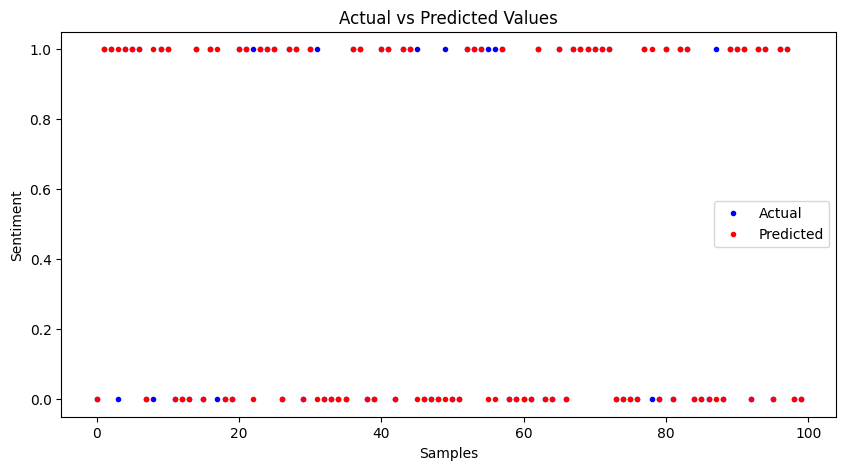

In [ ]:
# Plot predicted vs actual values
plt.figure(figsize=(10, 5))
plt.plot(y_test[:100], 'b.', label='Actual')
plt.plot(y_pred[:100], 'r.', label='Predicted')
plt.title('Actual vs Predicted Values')
plt.xlabel('Samples')
plt.ylabel('Sentiment')
plt.legend()
plt.show()

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8680 - loss: 0.6212
Test Loss: 0.6287065744400024
Test Accuracy: 0.8654000163078308


In [ ]:
# Calculate metrics
cm = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [ ]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [ ]:
# Print classification report
print("Classification Report:\n", classification_rep)

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.87      0.87     12500
           1       0.87      0.86      0.87     12500

    accuracy                           0.87     25000
   macro avg       0.87      0.87      0.87     25000
weighted avg       0.87      0.87      0.87     25000



782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step


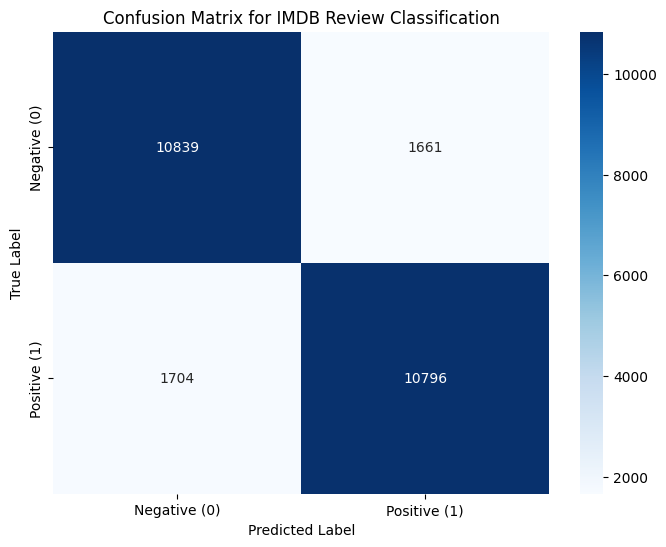

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.87      0.87     12500
           1       0.87      0.86      0.87     12500

    accuracy                           0.87     25000
   macro avg       0.87      0.87      0.87     25000
weighted avg       0.87      0.87      0.87     25000



In [ ]:
# Generate predictions
y_pred_probs = model.predict(x_test)
y_pred = (y_pred_probs > 0.5).astype(int)  # Convert probabilities to binary predictions (0 or 1)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative (0)', 'Positive (1)'],
            yticklabels=['Negative (0)', 'Positive (1)'])
plt.title('Confusion Matrix for IMDB Review Classification')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))